In [91]:
import pandas as pd
import numpy as np

In [92]:
data = pd.read_csv('shop_data.csv')

In [93]:
data

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [94]:
data['week'].dtype

dtype('O')

In [95]:
data[['date','month','year']] = data['week'].str.split('/', expand=True)
data

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [96]:
data = data.drop('week', axis=1)

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = data.drop('units_sold', axis=1)
y = data['units_sold']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [98]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7783023030169374

In [99]:
from sklearn.metrics import root_mean_squared_error
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_pred,y_test)
rmse

26.97068989687052

In [100]:
data.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

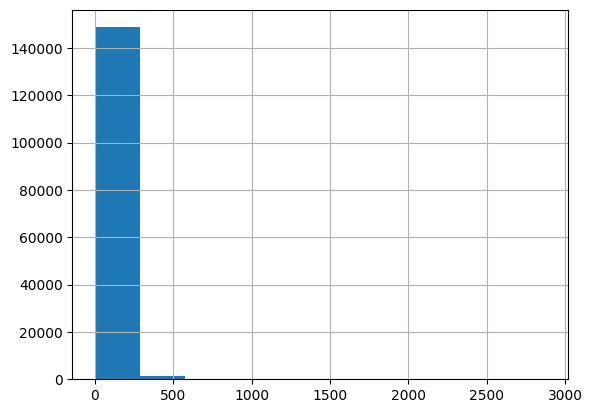

In [101]:
data.units_sold.hist()

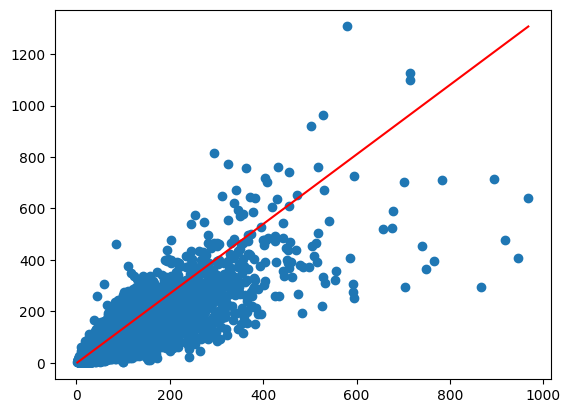

In [102]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()), color='red')
plt.show()

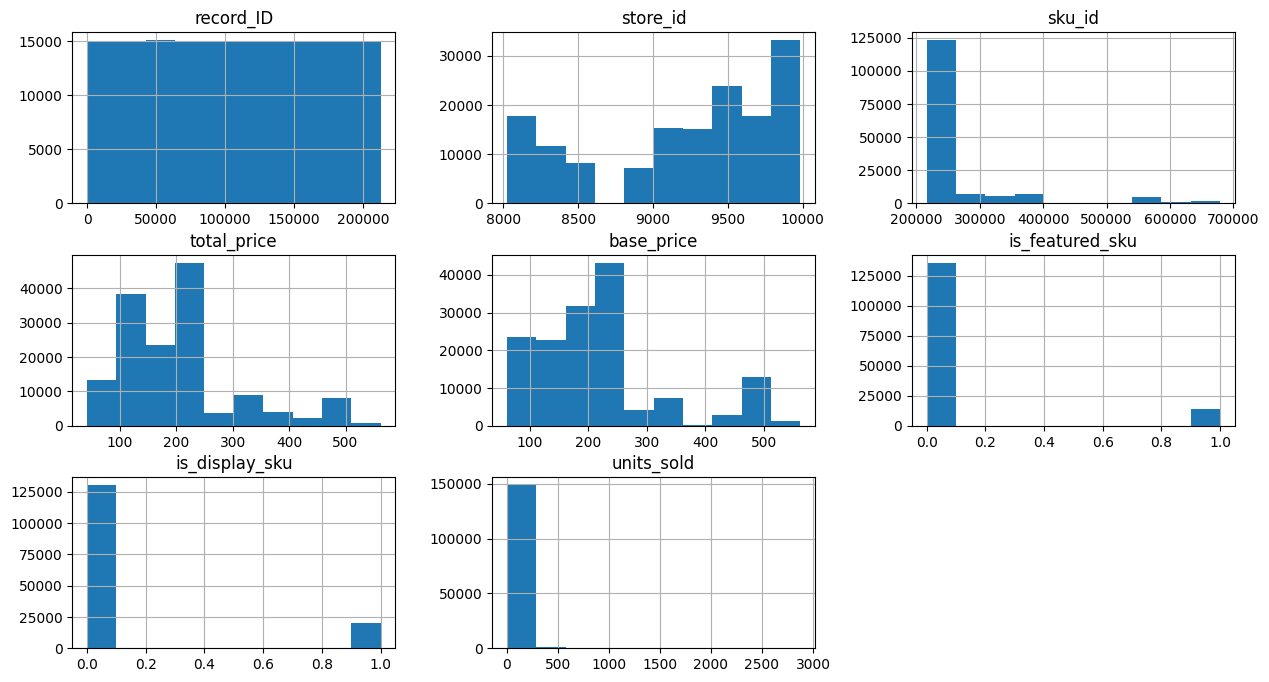

In [103]:
data.hist(figsize=(15,8))
plt.show()

In [104]:
data.drop('record_ID', axis=1, inplace=True)      #record id does not make any sense

#store_id and sku_id are actually categorical data so 

In [105]:
len(data.sku_id.unique())

28

In [106]:
len(data.store_id.unique())

76

In [107]:
max_unit = data.units_sold.quantile(0.99)     #99%ile units sold
max_unit

283.0

In [108]:
data = data[data.units_sold < max_unit]
data

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


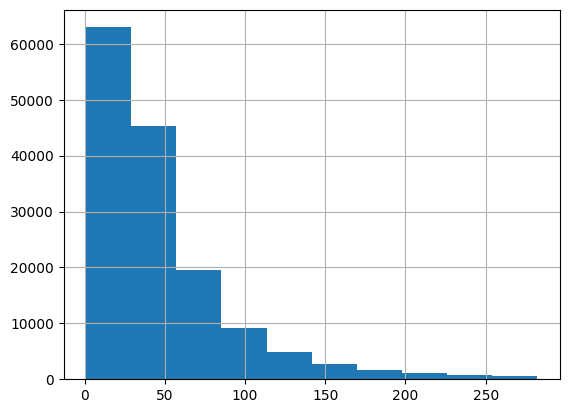

In [109]:
data.units_sold.hist()
plt.show()

In [110]:
data

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [111]:
data = data.join(pd.get_dummies(data.store_id, prefix='store'))
data = data.join(pd.get_dummies(data.sku_id, prefix='product'))

In [112]:
data

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year,...,product_320485,product_327492,product_378934,product_398721,product_545621,product_546789,product_547934,product_600934,product_673209,product_679023
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11,...,False,False,False,False,False,False,False,False,False,False
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11,...,False,False,False,False,False,False,False,False,False,False
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11,...,False,False,False,False,False,False,False,False,False,False
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11,...,False,False,False,False,False,False,False,False,False,False
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13,...,False,False,False,False,False,False,False,False,False,False
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13,...,False,False,False,False,False,False,False,False,False,False
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13,...,False,False,False,False,False,False,False,False,False,False
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.drop('sku_id', axis=1,inplace=True)
data

,store_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year,store_8023,...,product_320485,product_327492,product_378934,product_398721,product_545621,product_546789,product_547934,product_600934,product_673209,product_679023
0,8091,99.0375,111.8625,0,0,20,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
1,8091,99.0375,99.0375,0,0,28,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
2,8091,133.9500,133.9500,0,0,19,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
3,8091,133.9500,133.9500,0,0,44,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
4,8091,141.0750,141.0750,0,0,52,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,9984,235.8375,235.8375,0,0,38,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150146,9984,235.8375,235.8375,0,0,30,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150147,9984,357.6750,483.7875,1,1,31,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150148,9984,141.7875,191.6625,0,1,12,09,07,13,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.drop('store_id',axis=1,inplace=True)
data

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year,store_8023,store_8058,...,product_320485,product_327492,product_378934,product_398721,product_545621,product_546789,product_547934,product_600934,product_673209,product_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [116]:

x = data.drop('units_sold', axis=1)
y = data['units_sold']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [117]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8261478741826496

In [118]:
from sklearn.metrics import root_mean_squared_error
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_pred,y_test)
rmse

17.798303337642473

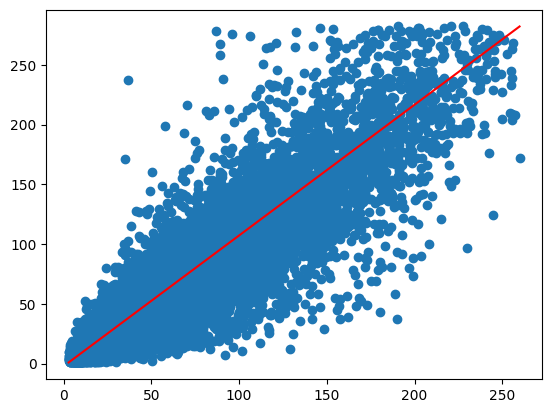

In [119]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()), color='red')
plt.show()

In [127]:
data.to_csv('modified_shop_data.csv')

In [ ]:
from xgboost import XGBRegressor
X = data.drop(columns=["units_sold"], axis=1)
y = data["units_sold"]


for col in X.select_dtypes(include=["object"]).columns:
    X[col] = pd.to_numeric(X[col], errors="coerce")  # convert to number
    X[col] = X[col].fillna(0).astype(int)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

# Predictions
y_pred = model.predict(X_test)



[0]	validation_0-rmse:41.33055	validation_1-rmse:41.08111
[1]	validation_0-rmse:39.98016	validation_1-rmse:39.73435
[2]	validation_0-rmse:38.84114	validation_1-rmse:38.61941
[3]	validation_0-rmse:37.67577	validation_1-rmse:37.46738
[4]	validation_0-rmse:36.67850	validation_1-rmse:36.48280
[5]	validation_0-rmse:35.89002	validation_1-rmse:35.70073
[6]	validation_0-rmse:35.11133	validation_1-rmse:34.92594
[7]	validation_0-rmse:34.51737	validation_1-rmse:34.34526
[8]	validation_0-rmse:33.93628	validation_1-rmse:33.74639
[9]	validation_0-rmse:33.31885	validation_1-rmse:33.12813
[10]	validation_0-rmse:32.75771	validation_1-rmse:32.57305
[11]	validation_0-rmse:32.24433	validation_1-rmse:32.06153
[12]	validation_0-rmse:31.83759	validation_1-rmse:31.67031
[13]	validation_0-rmse:31.45829	validation_1-rmse:31.32016
[14]	validation_0-rmse:31.08408	validation_1-rmse:30.96247
[15]	validation_0-rmse:30.77975	validation_1-rmse:30.66296
[16]	validation_0-rmse:30.46812	validation_1-rmse:30.34906
[17]	va

In [140]:
rmse = root_mean_squared_error(y_pred,y_test)
print('R2 score: ', model.score(X_test,y_test),'\nrmse:',rmse)

R2 score:  0.7770286727959528 
rmse: 20.156406621417574


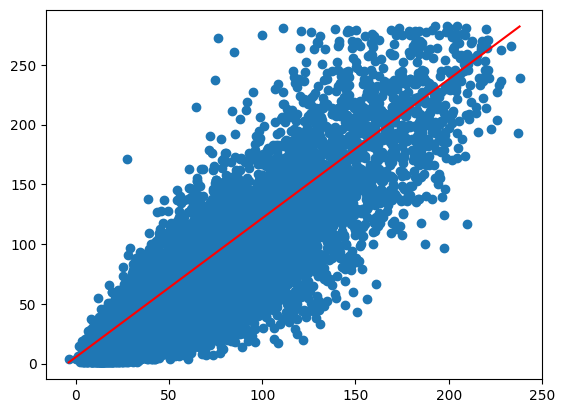

In [139]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()), color='red')
plt.show()